<a href="https://colab.research.google.com/github/nourhanOfTerra/CIFAR-10/blob/main/CIFAR10_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-10 Classification Model: Data Preprocessing and Feature Extraction

##Mounting Google Drive
Run the following cell to mount your Google Drive after uploading the project folder to your drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/CIFAR-10')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing and installing the required libraries

In [2]:
import numpy as np                                    # For operations on matrices
import matplotlib.pyplot as plt                       # For visualization
import pandas as pd                                   # For easier data analysis
import pickle                                         # For extraction of the dataset from its files
from sklearn.preprocessing import StandardScaler      # For standardizing the dataset before PCA
from sklearn.decomposition import PCA                 # For feature extraction using PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

##Importing the dataset
The data files will be "unpickled", to get an RGB feature matrix and a labels vector. Another vector contains the true names of the labels. Originally, the featurs are in the form of a 60000x3072 matrix, where each row is the representation of one image. The values corresponding to the red color component is represented in the first 1024 values, followed by 1024 for the green color component, and 1024 for the blue color component.

###Defining the paths of the files of the dataset

In [3]:
file_meta = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/batches.meta'
file1 = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/data_batch_1'
file2 = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/data_batch_2'
file3 = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/data_batch_3'
file4 = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/data_batch_4'
file5 = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/data_batch_5'
file_test = '/content/drive/MyDrive/CIFAR-10/cifar-10-batches-py/test_batch'

###File unpickling function

In [4]:
def unpickle(file):
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding = 'bytes')
  return dict

###Extracting the dataset from the files

In [5]:
dict_meta = unpickle(file_meta)   # True names of the labels
dict_file1 = unpickle(file1)     # Batch 1 features and labels
dict_file2 = unpickle(file2)     # Batch 2 features and labels
dict_file3 = unpickle(file3)     # Batch 3 features and labels
dict_file4 = unpickle(file4)     # Batch 4 features and labels
dict_file5 = unpickle(file5)     # Batch 5 features and labels
dict_test = unpickle(file_test)   # Test batch features and labels

###Extracting the features and labels from the dictionaries


In [6]:
data1 = dict_file1.get(b'data')
label1 = dict_file1.get(b'labels')
#print(data1)          #Sanity check
#print(label1)          #Sanity check

data2 = dict_file2.get(b'data')
label2 = dict_file2.get(b'labels')

data3 = dict_file3.get(b'data')
label3 = dict_file3.get(b'labels')

data4 = dict_file4.get(b'data')
label4 = dict_file4.get(b'labels')

data5 = dict_file5.get(b'data')
label5 = dict_file5.get(b'labels')
#print(data5)          #Sanity check
#print(label5)          #Sanity check

test_feat = dict_test.get(b'data')
test_lab = dict_test.get(b'labels')

labels_names = dict_meta.get(b'label_names')

##Recombining all parts of the dataset to get unified features and labels
It would be better to combine the dataset at first due to two reasons. The first is that we would need to do feature extraction in all cases except when using CNNs, and the feature extraction stage should be applied for the whole dataset including both training and testing parts. The second reason is that it would be better for generalization purposes if we randomize the split into training, validation and testing sets.

In [7]:
features = np.vstack([data1, data2, data3, data4, data5, test_feat])
labels = np.hstack([label1, label2, label3, label4, label5, test_lab])

The next cell is for putting the arrays in pandas dataframe format. This would make analysis easier. 

In [8]:
df_features = pd.DataFrame(features)
df_labels = pd.DataFrame(labels)
df_labels_names = pd.DataFrame(labels_names)

##Feature Extraction using PCA
Since the number of features is ridiculously large, it would be beneficial and efficient to do feature extraction to retain only the features that have effect on the result. This would also prevent overfitting. The main idea is to erase any dependancies between the features and obtain a set of features that is completely independent from each other.

###Standardization
The features are first standardized to get rid of the huge difference between some of the values. The mean = 0 and the variance = 1 after standardization.

In [9]:
standardized = StandardScaler().fit_transform(features)

###PCA
Hyperparameter: n_components. 

To get the optimum number of components, we should get the variance (sigma) for each principle component such that we keep only the principle components that are more relevant. To optimize this process, the sum of the variance ratios is plotted against the number of principle components. What I am trying to do here is to get the best number of principle components that would be much less than the original number of features but still retaining as much variance as possible. The next cell is needed to only run once where we figure out the optimum number of PCs. Note that this is a costly operation, so it is better to only increase the number of PCs under investigation by incrementing by 10 at a time until we reach sum of variance ratios in the 90s.

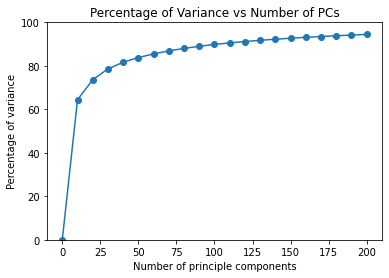

In [ ]:
#sum_sig_percent = []
#num_components = list(range(0, 201, 10))

#for i in range(0, 201, 10):
  #pca = PCA(n_components = i)
  #principle_components = pca.fit_transform(standardized)
  #sig = pca.explained_variance_ratio_
  #sig_percent = np.sum(sig) * 100
  #sum_sig_percent.append(sig_percent)

#plt.plot(num_components, sum_sig_percent, marker = 'o')
#plt.ylim([0, 100])
#plt.title('Percentage of Variance vs Number of PCs')
#plt.xlabel('Number of principle components')
#plt.ylabel('Percentage of variance')
#plt.savefig('Percentage of Variance vs Number of PCs.png')

This upcoming method is even more efficient to acheive the same result. Here I am using numpy cumsum function to automatically get the accumulative sum of the variance ratios at each number of components without adding more time complexity like in the previous cell that makes this operation manually.

In [ ]:
pca = PCA().fit(standardized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0.4, 1])
plt.xlim([0, 600])
plt.title('Percentage of Variance vs Number of PCs')
plt.xlabel('Number of principle components')
plt.ylabel('Percentage of variance')
plt.grid()
plt.savefig('Percentage of Variance vs Number of PCs using cumsum.png')

According to the plot, if we stop at 102 PCS, we retain around 89.98% of the variance. Now after deciding on the optimum number of principle components to use, we proceed with saving the principle components as our feature matrix.

In [10]:
pca = PCA(n_components = 102)
features_extracted = pca.fit_transform(standardized)
sig = pca.explained_variance_ratio_
sig_percent = np.sum(sig) * 100
df_extacted_features = pd.DataFrame(features_extracted)
print(sig_percent)

89.9767496195259


##Exporting the dataset to CSV
This is to allow other files in this project to access the same data without having to come back to this file.

In [11]:
df_features.to_csv('features.csv', index = False)
df_extacted_features.to_csv('extracted features.csv', index = False)
df_labels.to_csv('labels.csv', index = False)
df_labels_names.to_csv('labels names.csv', index = False)